# 0.0 - Imports Libraries

In [1]:
import pandas as pd
import numpy  as np

from matplotlib       import pyplot  as plt
from sklearn          import metrics as mt
from sklearn.ensemble import RandomForestClassifier

# 0.1 - Load Dataset

In [2]:
# train dataset
X_train = pd.read_csv('../dataset/classificacao/X_training.csv')
y_train = pd.read_csv('../dataset/classificacao/y_training.csv')

# validation dataset
X_val = pd.read_csv('../dataset/classificacao/X_validation.csv')
y_val = pd.read_csv('../dataset/classificacao/y_validation.csv')

# test dataset
X_test = pd.read_csv('../dataset/classificacao/X_test.csv')
y_test = pd.read_csv('../dataset/classificacao/y_test.csv')

In [3]:
y_train = y_train.iloc[:,0]
y_val = y_val.iloc[:,0]
y_test = y_test.iloc[:, 0]

# 2.0 - Random Forest Classifier

Parameters:
* n_estimators
* max_depth

## 2.1 - Performance for Train Dataset

In [4]:
# Definition
model_train = RandomForestClassifier( random_state=77 )

# Fit
model_train.fit( X_train, y_train )

# Predict
yhat_train = model_train.predict( X_train )

# Performance Metrics
accuracy_train = mt.accuracy_score( y_train, yhat_train )
precision_train = mt.precision_score( y_train, yhat_train ) 
recall_train = mt.recall_score( y_train, yhat_train )
f1_score_train = mt.f1_score( y_train, yhat_train )

print( f'A acurácia é: {accuracy_train:.2%}' )
print( f'A precisão é: {precision_train:.2%}')
print( f'Recall é: {recall_train:.2%}' )
print( f'F1 Score é: {f1_score_train:.2%}')

A acurácia é: 100.00%
A precisão é: 100.00%
Recall é: 100.00%
F1 Score é: 100.00%


## 2.2 - Performance for Validation Dataset

In [5]:
# Definition
model_val = RandomForestClassifier( random_state=77 )

# Fit
model_val.fit( X_train, y_train )

# Predict
yhat_val = model_val.predict( X_val )

# Performance Metrics
accuracy_val = mt.accuracy_score( y_val, yhat_val )
precision_val = mt.precision_score( y_val, yhat_val )
recall_val = mt.recall_score( y_val, yhat_val )
f1_score_val = mt.f1_score( y_val, yhat_val )

print( f'A acurácia é: {accuracy_val:.2%}' )
print( f'A precisão é: {precision_val:.2%}' )
print( f'Recall: {recall_val:.2%}' )
print( f'F1 Score: {f1_score_val:.2%}' )

A acurácia é: 96.47%
A precisão é: 97.34%
Recall: 94.44%
F1 Score: 95.87%


## 2.3 - Hyperparameters Fine Tunning

### N Estimators

In [6]:
n_estimators = np.arange( 10, 410, 10 )

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [7]:
for i in n_estimators:
    # Train Model
    model = RandomForestClassifier( n_estimators=i, random_state=77 )

    # Fit
    model.fit( X_train, y_train )

    # Predict
    yhat_pred = model.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, yhat_pred )
    precision = mt.precision_score( y_val, yhat_pred )
    recall = mt.recall_score( y_val, yhat_pred )
    f1_score = mt.f1_score( y_val, yhat_pred)

    accuracy_list.append( accuracy )
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score )

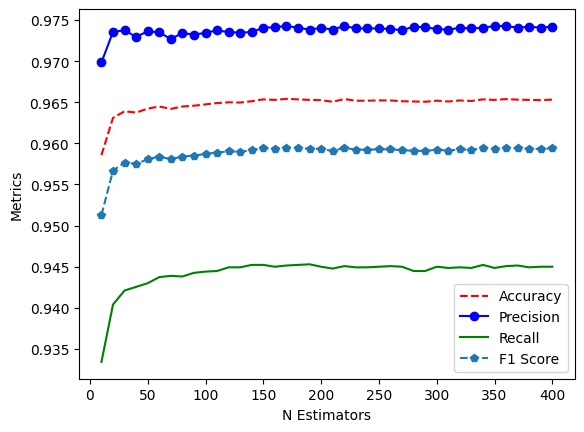

In [8]:
plt.plot( n_estimators, accuracy_list, 'r--', label='Accuracy')
plt.plot( n_estimators, precision_list, 'bo-', label='Precision')
plt.plot( n_estimators, recall_list, 'g-', label='Recall')
plt.plot( n_estimators, f1_score_list, 'p--', label='F1 Score')
plt.xlabel( 'N Estimators' )
plt.ylabel( 'Metrics' )
plt.legend();

In [9]:
best_estimator = n_estimators[np.argmax(precision_list)]
best_estimator

170

### Max Depth

In [10]:
max_depth = np.arange( 1, 71, 1)

accuracy_list = []
precision_list = []
recall_list  = []
f1_score_list = []

In [11]:
for m in max_depth:
    # Train Model
    model = RandomForestClassifier( max_depth=m, random_state=77 )

    # Fit
    model.fit( X_train, y_train )

    # Predict
    yhat_pred = model.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, yhat_pred )
    precision = mt.precision_score( y_val, yhat_pred )
    recall = mt.recall_score( y_val, yhat_pred )
    f1_score = mt.f1_score( y_val, yhat_pred )

    accuracy_list.append( accuracy )
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score )

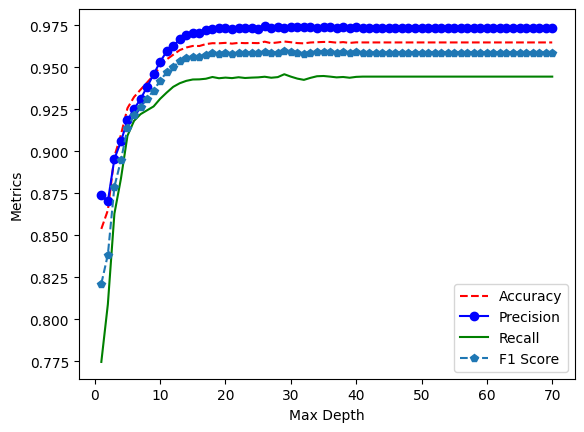

In [12]:
plt.plot( max_depth, accuracy_list, 'r--', label='Accuracy')
plt.plot( max_depth, precision_list, 'bo-', label='Precision')
plt.plot( max_depth, recall_list, 'g-', label='Recall')
plt.plot( max_depth, f1_score_list, 'p--', label='F1 Score')
plt.xlabel( 'Max Depth' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_depth = max_depth[np.argmax(precision_list)]
best_depth

26

## 2.4 - Performance for Test Dataset

In [14]:
# Definition
model = RandomForestClassifier( max_depth=best_depth, n_estimators=best_estimator )

# Fit
model.fit( pd.concat([X_train, X_val] ), pd.concat( [y_train, y_val] ) )


# Predict
yhat_test = model.predict( X_test )

# Performance Metrics
accuracy_test = mt.accuracy_score( y_test, yhat_test )
precision_test = mt.precision_score( y_test, yhat_test )
recall_test = mt.recall_score( y_test, yhat_test )
f1_score_test = mt.f1_score( y_test, yhat_test )


print( f'A acuracia é: {accuracy_test:.3%}')
print( f'A precisão é: {precision_test:.3%}' )
print( f'Recall é: {recall_test:.3%}' )
print( f'F1 Score é: {f1_score_test:.3%}' )

A acuracia é: 96.532%
A precisão é: 97.426%
Recall é: 94.597%
F1 Score é: 95.991%
